# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okha
Processing Record 2 of Set 1 | limon
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | esil
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | campbell river
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | tughyl
Processing Record 12 of Set 1 | kisangani
Processing Record 13 of Set 1 | barcelos
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | metro
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | i-n-salah
Processing Record 22 of Set 1 | daru
Processing Record 23 of Set 1 | pand

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okha,53.5739,142.9478,1.89,86,3,3.15,RU,1727815311
1,limon,10.0000,-83.0333,26.94,94,100,2.06,CR,1727815311
2,edinburgh of the seven seas,-37.0676,-12.3116,13.68,86,5,9.03,SH,1727815311
3,esil,51.9556,66.4042,12.06,58,87,5.19,KZ,1727815274
4,fortuna,40.5982,-124.1573,25.52,60,0,4.63,US,1727815311


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okha,53.5739,142.9478,1.89,86,3,3.15,RU,1727815311
1,limon,10.0000,-83.0333,26.94,94,100,2.06,CR,1727815311
2,edinburgh of the seven seas,-37.0676,-12.3116,13.68,86,5,9.03,SH,1727815311
3,esil,51.9556,66.4042,12.06,58,87,5.19,KZ,1727815274
4,fortuna,40.5982,-124.1573,25.52,60,0,4.63,US,1727815311


In [8]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, 0 to 585
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        586 non-null    object 
 1   Lat         586 non-null    float64
 2   Lng         586 non-null    float64
 3   Max Temp    586 non-null    float64
 4   Humidity    586 non-null    int64  
 5   Cloudiness  586 non-null    int64  
 6   Wind Speed  586 non-null    float64
 7   Country     581 non-null    object 
 8   Date        586 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 45.8+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

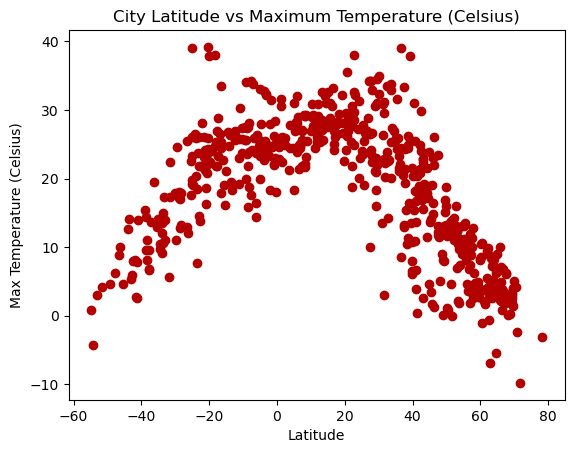

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.Lat, city_data_df['Max Temp'],c='#b30000')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('City Latitude vs Maximum Temperature (Celsius)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

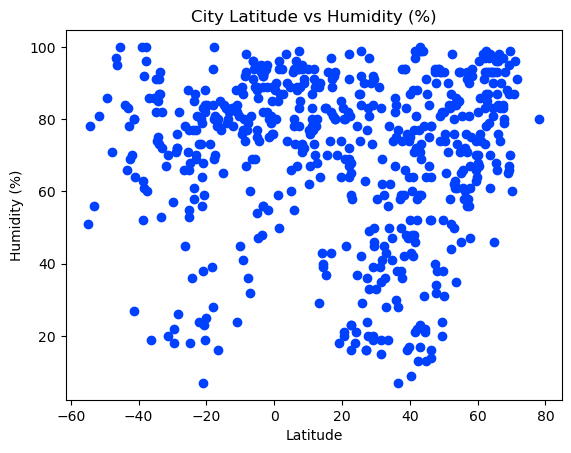

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.Lat, city_data_df['Humidity'],c='#0040ff')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

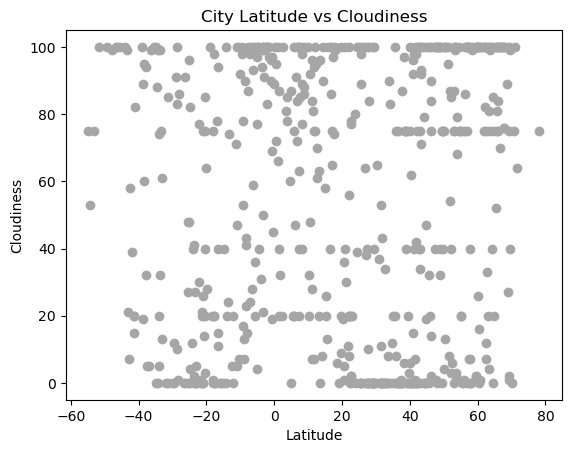

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.Lat, city_data_df['Cloudiness'],c='#a6a6a6')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

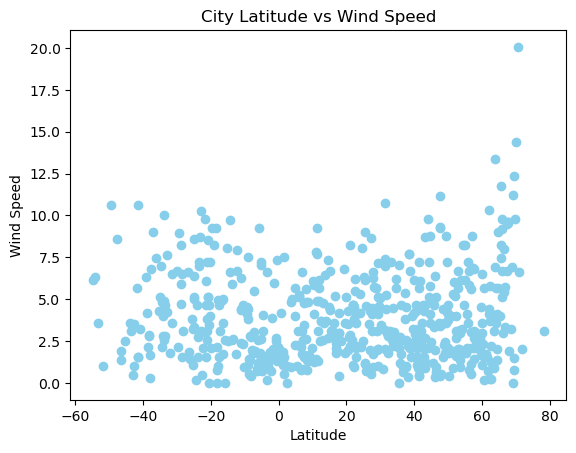

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.Lat, city_data_df['Wind Speed'],c='skyblue')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def regression(x, y, xlabel, ylabel):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, color='#9494b8')
    plt.plot(x , regress_values, "r-")
    plt.annotate(line_eq,(0,intercept), color="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filter = city_data_df.Lat >= 0

northern_hemi_df = city_data_df.loc[filter]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okha,53.5739,142.9478,1.89,86,3,3.15,RU,1727815311
1,limon,10.0000,-83.0333,26.94,94,100,2.06,CR,1727815311
3,esil,51.9556,66.4042,12.06,58,87,5.19,KZ,1727815274
4,fortuna,40.5982,-124.1573,25.52,60,0,4.63,US,1727815311
6,campbell river,50.0163,-125.2446,12.00,93,100,2.06,CA,1727815145


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filter = city_data_df.Lat < 0

southern_hemi_df = city_data_df.loc[filter]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,13.68,86,5,9.03,SH,1727815311
5,hithadhoo,-0.6000,73.0833,28.42,76,19,7.36,MV,1727815311
7,grytviken,-54.2811,-36.5092,-4.29,78,53,6.32,GS,1727815311
8,port mathurin,-19.6833,63.4167,22.41,84,28,9.24,MU,1727815312
9,ta`u,-14.2336,-169.5144,24.72,83,100,9.72,AS,1727815312


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6709349725134428


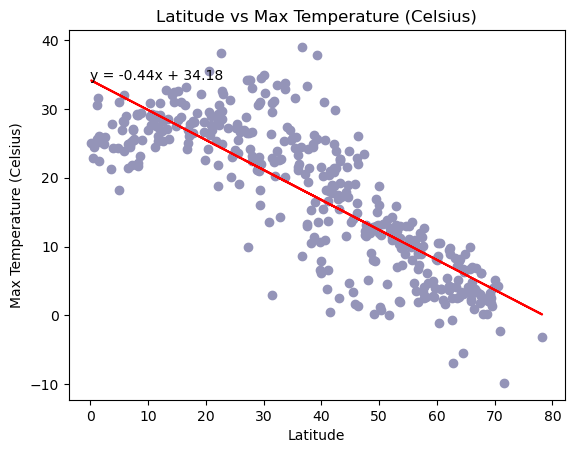

In [45]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df.Lat, northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (Celsius)')

The r-value is: 0.5587953318202549


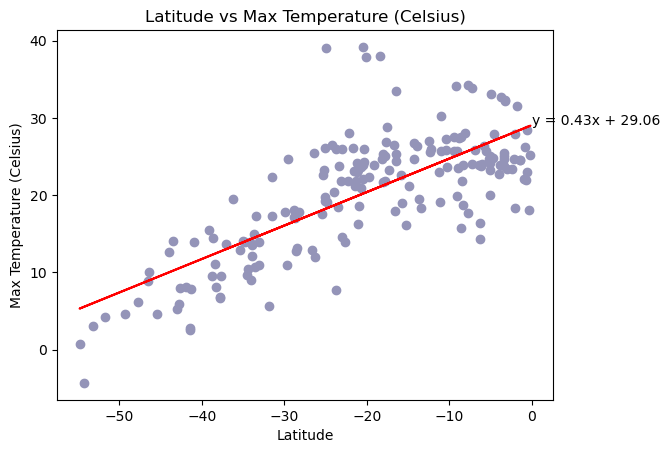

In [46]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df.Lat, southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (Celsius)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.003157319452029181


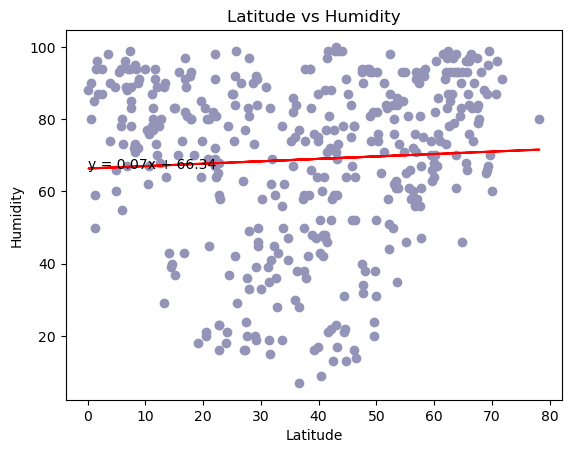

In [47]:
# Northern Hemisphere
regression(northern_hemi_df.Lat, northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.012007917462726829


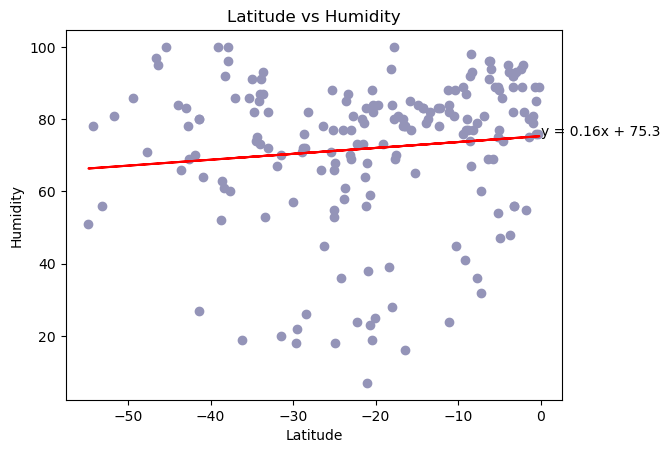

In [48]:
# Southern Hemisphere
regression(southern_hemi_df.Lat, southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005402026710690795


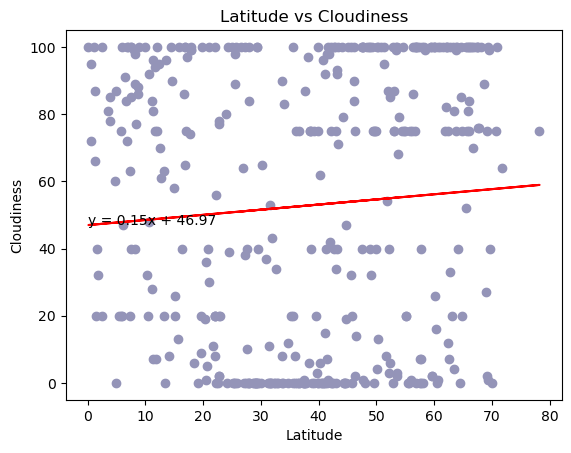

In [49]:
# Northern Hemisphere
regression(northern_hemi_df.Lat, northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.010860443201101808


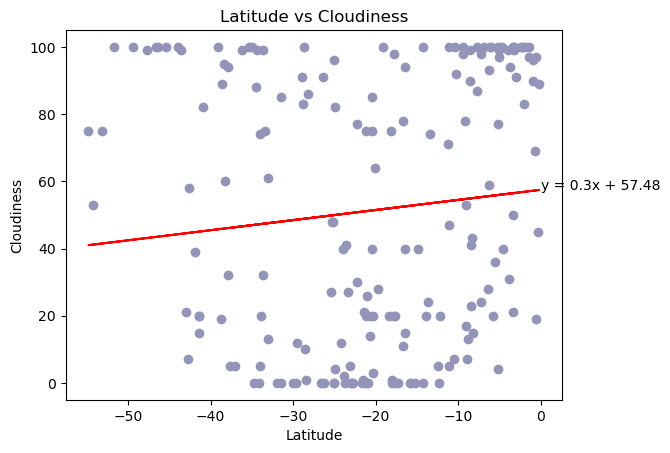

In [50]:
# Southern Hemisphere
regression(southern_hemi_df.Lat, southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03336526577184532


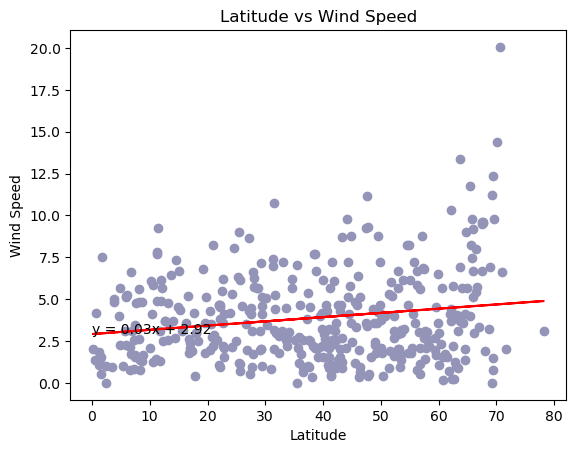

In [51]:
# Northern Hemisphere
regression(northern_hemi_df.Lat, northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.055290252488848016


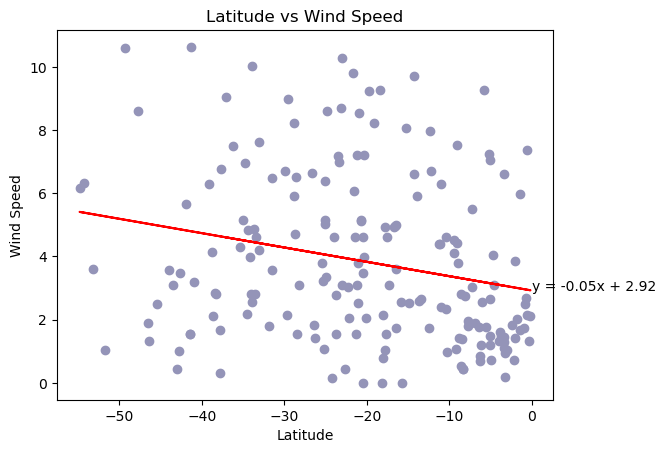

In [52]:
# Southern Hemisphere
regression(southern_hemi_df.Lat, southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE